### HYPOTHESIS TESTING

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# load the dataset
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Problem one:
Is there a statistically significant difference between charges based on sex.

Text(0.5, 1.0, 'Average Charges By Gender')

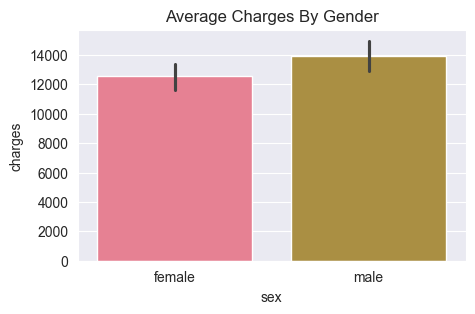

In [8]:
sns.set_style('darkgrid')
sns.set_palette('husl')

plt.figure(figsize=(5,3))
sns.barplot(data=data, x = 'sex', y = 'charges', hue='sex')
plt.title(label="Average Charges By Gender")

In [33]:
# set up the test.

# step 1: define the null and alternative hypothesis

null = "There is no statistically significant difference between charges across gender"
alternative = "There is a statistically significant difference between charges across gender"

# step 2: Choose the level of significance.
alpha = 0.05

# step 3: Conduct the test.
t_stats, p_value = stats.ttest_ind(a = data[data['sex'] == 'male']['charges'],
                                        b = data[data['sex'] == 'female']['charges'])

# step 4: setup the decision rule and make conclusion
if p_value < alpha:
    print(f'{alternative} @ pvalue of {p_value}')
else:
    print(f'{null} @ pvalue of {p_value}')


There is a statistically significant difference between charges across gender @ pvalue of 0.03613272100592976


0.03613272100592976

#### Problem Two:
Is there a statistically significant difference between charges based on smoking habit.

Text(0.5, 1.0, 'Average Charges By Smoker')

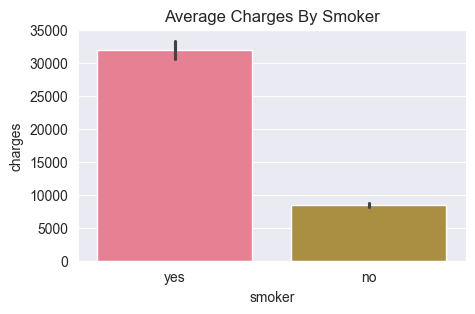

In [25]:
plt.figure(figsize=(5,3))
sns.barplot(data=data, x = 'smoker', y = 'charges', hue='smoker')
plt.title(label="Average Charges By Smoker")

In [32]:
# set up the test.

# step 1: define the null and alternative hypothesis

null = "There is no statistically significant difference between charges across smoker"
alternative = "There is a statistically significant difference between charges across smoker"

# step 2: Choose the level of significance.
alpha = 0.05

# step 3: Conduct the test.
t_stats, p_value = stats.ttest_ind(a = data[data['smoker'] == 'yes']['charges'],
                                        b = data[data['smoker'] == 'no']['charges'])

# step 4: setup the decision rule and make conclusion
if p_value < alpha:
    print(f'{alternative} @ pvalue of {p_value}')
else:
    print(f'{null} @ pvalue of {p_value}')


There is a statistically significant difference between charges across smoker @ pvalue of 8.271435842179102e-283


#### Problem Three:
Is there a statistically significant difference between charges based on region.

Text(0.5, 1.0, 'Average Charges By region')

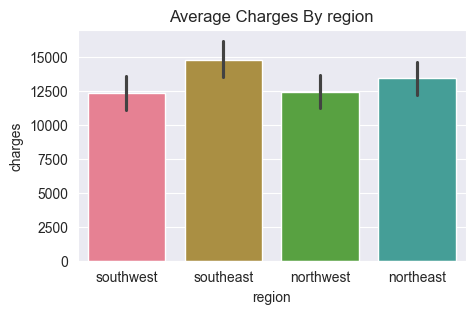

In [26]:
plt.figure(figsize=(5,3))
sns.barplot(data=data, x = 'region', y = 'charges', hue='region')
plt.title(label="Average Charges By region")

In [ ]:
# set up the test.

# step 1: define the null and alternative hypothesis

null = "There is no statistically significant difference between charges across smoker"
alternative = "There is a statistically significant difference between charges across smoker"

# step 2: Choose the level of significance.
alpha = 0.05

# step 3: Conduct the test.
anova_stats, p_value = stats.f_oneway(data[data['region'] == 'southeast']['charges'],
                                  data[data['region'] == 'southwest']['charges'],
                                  data[data['region'] == 'northwest']['charges'],
                                  data[data['region'] == 'northeast']['charges'])

# step 4: setup the decision rule and make conclusion
if p_value < alpha:
    print(f'{alternative} @ pvalue of {p_value}')
else:
    print(f'{null} @ pvalue of {p_value}')


There is a statistically significant difference between charges across smoker @ pvalue of 0.0308933560705201


#### Problem four:

Is there a statistically significant relationship between charges and bmi.

Text(0.5, 1.0, 'Charges By BMI')

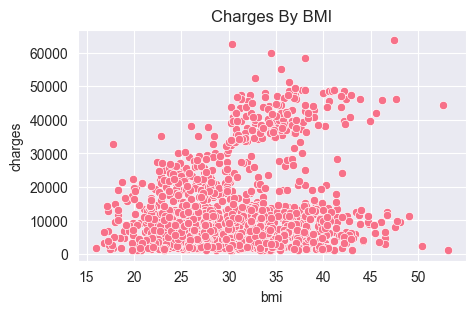

In [34]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=data, x = 'bmi', y = 'charges')
plt.title(label="Charges By BMI")

In [35]:
# set up the test.

# step 1: define the null and alternative hypothesis

null = "There is no statistically significant relationship between charges and bmi"
alternative = "There is a statistically significant difference between charges and bmi"

# step 2: Choose the level of significance.
alpha = 0.05

# step 3: Conduct the test.
corr_coeff, p_value = stats.spearmanr(a = data['bmi'], b = data['charges'])

# step 4: setup the decision rule and make conclusion
if p_value < alpha:
    print(f'{alternative} @ pvalue of {p_value}')
else:
    print(f'{null} @ pvalue of {p_value}')


There is a statistically significant difference between charges and bmi @ pvalue of 1.1926059544526874e-05


In [36]:
corr_coeff

0.11939590358331145

#### Problem five:

Is there a statistically significant association between smoking habit and gender.

Text(0.5, 1.0, 'Distribution Of Clients By Smoking Habit and Gender')

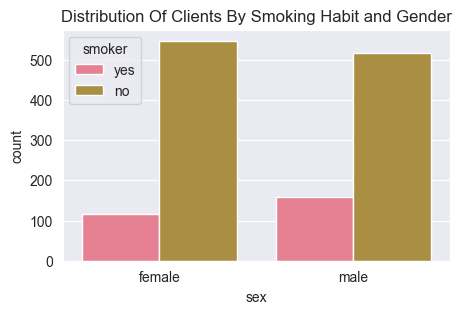

In [38]:
plt.figure(figsize=(5,3))
sns.countplot(data=data, x = 'sex', hue='smoker')
plt.title(label="Distribution Of Clients By Smoking Habit and Gender")

In [42]:
# set up the test.

# step 1: define the null and alternative hypothesis

null = "There is no statistically significant relationship between smoker and gender"
alternative = "There is a statistically significant relationship between smoker and gender"

# step 2: Choose the level of significance.
alpha = 0.05

# step 3: Conduct the test.
sex_smoke_cross = pd.crosstab(data['sex'], data['smoker'])
chi_stats, p_value, dof, exp = stats.chi2_contingency(sex_smoke_cross)

# step 4: setup the decision rule and make conclusion
if p_value < alpha:
    print(f'{alternative} @ pvalue of {p_value}')
else:
    print(f'{null} @ pvalue of {p_value}')


There is a statistically significant relationship between smoker and gender @ pvalue of 0.006548143503580697


Chi2ContingencyResult(statistic=7.39291081459996, pvalue=0.006548143503580697, dof=1, expected_freq=array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]]))

In [43]:
sex_smoke_cross

smoker,no,yes
sex,,
female,547,115
male,517,159
